<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Flight_Ticket_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#All mathematical operation are done by numpy
import numpy as np
#It is used for ploting 
import matplotlib.pyplot as plt
# for read all files
import pandas as pd
import math
import random
import seaborn as sns

In [2]:
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab 

Mounted at /content/drive


In [3]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [4]:
# Read Excel File
dataset = pd.read_excel('Flight_Price_Prediction_Train_Data.xlsx')

In [5]:
# Analysize dataset
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Preprocessing

In [7]:
# Drop all Null rows from dataset
dataset.dropna(inplace=True)

In [8]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
# Get unique values from particular column
np.unique(dataset['Airline'])

array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object)

In [10]:
np.unique(dataset['Additional_Info'])

array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No Info', 'No check-in baggage included', 'No info',
       'Red-eye flight'], dtype=object)

In [11]:
# Convert Categorical value to numeric value
#dataset['Airline']= pd.Categorical(dataset['Airline'])
#dataset['Additional_Info'] = pd.Categorical(dataset['Additional_Info'])

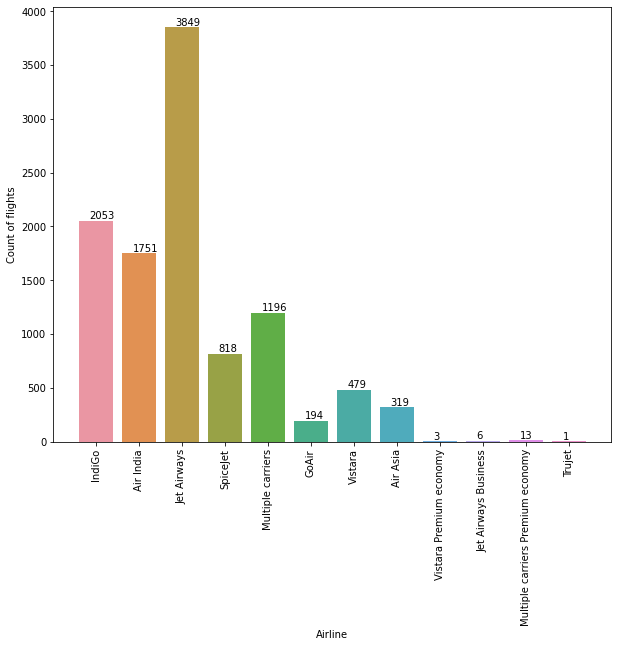

In [12]:
# Visualize data between Airline and Number of Flights
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'Airline',data=dataset)
ax.plot()
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [13]:
# Convert Categorical Value to Numeric value
dataset['Airline'].replace(['Air Asia','Air India','GoAir',
                                'IndiGo', 'Jet Airways','Jet Airways Business', 
                                'Multiple carriers','Multiple carriers Premium economy', 'SpiceJet', 
                                'Trujet','Vistara', 'Vistara Premium economy'],
                               [1,2,3,4,5,6,7,8,9,10,11,12], inplace= True)
dataset['Additional_Info'].replace(['1 Long layover', '1 Short layover', '2 Long layover',
                                    'Business class', 'Change airports', 'In-flight meal not included',
                                    'No Info', 'No check-in baggage included', 'No info',
                                    'Red-eye flight'],
                                   [1,2,3,4,5,6,7,8,9,10], inplace= True)

In [14]:
#dataset['Airline'] = dataset['Airline'].cat.codes
#dataset['Additional_Info'] = dataset['Additional_Info'].cat.codes

In [15]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,4,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,9,3897
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,9,7662
2,5,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,9,13882
3,4,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,9,6218
4,4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,9,13302


In [16]:
# Converting Hours into Minute 
# Convert Duration column into Minute
dataset['Duration']=  dataset['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

Text(0, 0.5, 'Price')

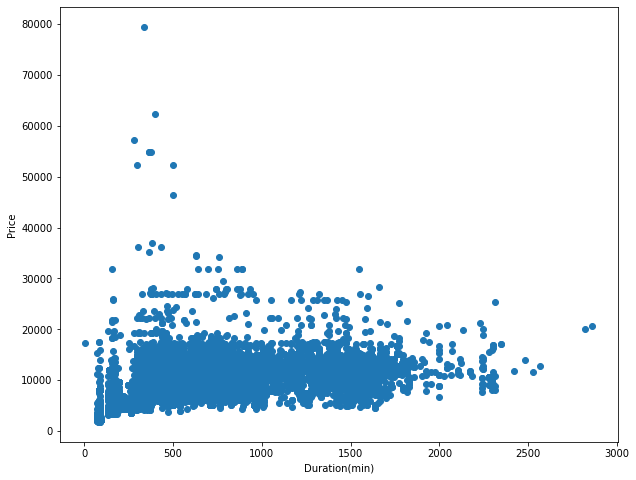

In [17]:
# Visualize data between Flight-Duration and Price of Flight
x = dataset['Duration']
y = dataset['Price']
plt.figure(figsize = (10, 8))
plt.scatter(x,y)
plt.xlabel('Duration(min)')
plt.ylabel('Price')

In [18]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,4,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,9,3897
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,9,7662
2,5,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,9,13882
3,4,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,9,6218
4,4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,9,13302


In [19]:
# Get Unique value from Total_Stops column
np.unique(dataset['Total_Stops'])

array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
      dtype=object)

In [20]:
# Convert Categorical Value to Numeric value for Total_Stop
dataset['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'],[1,0,2,3,4], inplace= True)

Text(0, 0.5, 'Price')

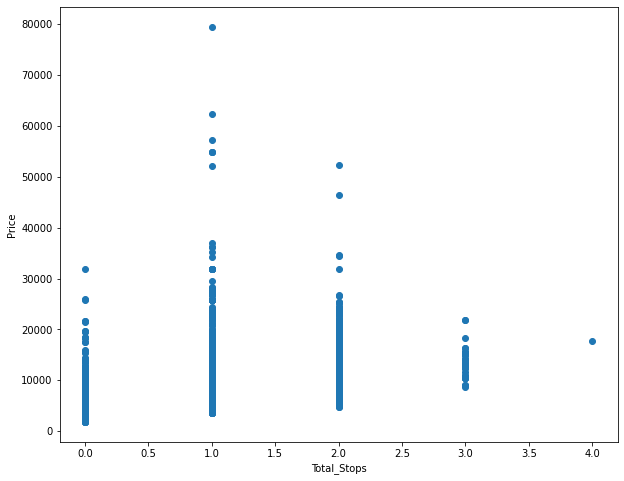

In [21]:
# Visualize data between Total_Stop and Price of Flight
x = dataset['Total_Stops']
y = dataset['Price']
plt.figure(figsize = (10, 8))
plt.scatter(x,y)
plt.xlabel('Total_Stops')
plt.ylabel('Price')

In [22]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,4,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,9,3897
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,9,7662
2,5,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,9,13882
3,4,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,9,6218
4,4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,9,13302


In [23]:
# Take Unique Source city name
np.unique(dataset['Source'])

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [24]:
# Take Unique Destination city name
np.unique(dataset['Destination'])

array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype=object)

In [25]:
# Convert Categorical Value to Numeric value for Source nad Destination
dataset['Source'].replace(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'],[1,2,3,4,5], inplace= True)
dataset['Destination'].replace(['Banglore', 'Cochin', 'Delhi', 'Kolkata', 'Hyderabad','New Delhi'],[1,2,3,4,5,6], inplace= True)

In [26]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,4,24/03/2019,1,6,BLR → DEL,22:20,01:10 22 Mar,170,0,9,3897
1,2,1/05/2019,4,1,CCU → IXR → BBI → BLR,05:50,13:15,445,2,9,7662
2,5,9/06/2019,3,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,9,13882
3,4,12/05/2019,4,1,CCU → NAG → BLR,18:05,23:30,325,1,9,6218
4,4,01/03/2019,1,6,BLR → NAG → DEL,16:50,21:35,285,1,9,13302


In [27]:
# Splitting Date_of_Journey column into two different column
# Add two new columns 'Journey_Day' and 'Journey_month' 
dataset['Journey_Day']=dataset['Date_of_Journey'].str.split("/").str[0].astype(int)
dataset['Journey_month']=dataset['Date_of_Journey'].str.split("/").str[1].astype(int)

# Removing 'Date_of_Journey' column
dataset.drop(['Date_of_Journey'],axis=1,inplace=True)

In [28]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,4,1,6,BLR → DEL,22:20,01:10 22 Mar,170,0,9,3897,24,3
1,2,4,1,CCU → IXR → BBI → BLR,05:50,13:15,445,2,9,7662,1,5
2,5,3,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,9,13882,9,6
3,4,4,1,CCU → NAG → BLR,18:05,23:30,325,1,9,6218,12,5
4,4,1,6,BLR → NAG → DEL,16:50,21:35,285,1,9,13302,1,3


In [29]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,4,1,6,BLR → DEL,22:20,01:10 22 Mar,170,0,9,3897,24,3
1,2,4,1,CCU → IXR → BBI → BLR,05:50,13:15,445,2,9,7662,1,5
2,5,3,2,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,9,13882,9,6
3,4,4,1,CCU → NAG → BLR,18:05,23:30,325,1,9,6218,12,5
4,4,1,6,BLR → NAG → DEL,16:50,21:35,285,1,9,13302,1,3


In [30]:
# Splitting 'Dep_Time' column into two different column
# Adding two new columns 'Dep_hour' and 'Dep_min' 
dataset["Dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour
dataset["Dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute

# Removing 'Dep_Time' column
dataset.drop(['Dep_Time'],axis=1,inplace=True)

In [31]:
# Splitting 'Arrival_Time' column into two different column
# Adding two new columns 'Arr_hour' and 'Arr_min'
dataset["Arr_hour"] = pd.to_datetime(dataset["Arrival_Time"]).dt.hour
dataset["Arr_min"] = pd.to_datetime(dataset["Arrival_Time"]).dt.minute

# Removing 'Arrival_Time' column
dataset.drop(['Arrival_Time'],axis=1,inplace=True)

In [32]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,4,1,6,BLR → DEL,170,0,9,3897,24,3,22,20,1,10
1,2,4,1,CCU → IXR → BBI → BLR,445,2,9,7662,1,5,5,50,13,15
2,5,3,2,DEL → LKO → BOM → COK,1140,2,9,13882,9,6,9,25,4,25
3,4,4,1,CCU → NAG → BLR,325,1,9,6218,12,5,18,5,23,30
4,4,1,6,BLR → NAG → DEL,285,1,9,13302,1,3,16,50,21,35


In [33]:
# Convert Categorical Value to Numeric Value for 'Route' 
dataset['Route'] = pd.Categorical(dataset['Route'])
dataset['Route'] = dataset['Route'].cat.codes

In [34]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,4,1,6,18,170,0,9,3897,24,3,22,20,1,10
1,2,4,1,84,445,2,9,7662,1,5,5,50,13,15
2,5,3,2,118,1140,2,9,13882,9,6,9,25,4,25
3,4,4,1,91,325,1,9,6218,12,5,18,5,23,30
4,4,1,6,29,285,1,9,13302,1,3,16,50,21,35


In [35]:
# Calculating Correlation 
corr = dataset.corr()
print(corr)

                  Airline    Source  Destination  ...   Dep_min  Arr_hour   Arr_min
Airline          1.000000 -0.013397     0.005336  ... -0.059922 -0.007567 -0.071092
Source          -0.013397  1.000000    -0.482778  ... -0.056998  0.025635  0.021040
Destination      0.005336 -0.482778     1.000000  ...  0.122439 -0.042317  0.033701
Route            0.025214  0.403412    -0.514091  ... -0.068071  0.013898 -0.173352
Duration        -0.159651  0.161886    -0.265402  ... -0.019099  0.051531 -0.069663
Total_Stops     -0.199396  0.192840    -0.301335  ... -0.002618  0.038140 -0.106940
Additional_Info -0.060748 -0.022109     0.020904  ... -0.019392  0.026204  0.041310
Price           -0.039565  0.015999    -0.084893  ... -0.024458  0.024244 -0.086155
Journey_Day      0.026137  0.004902    -0.043023  ... -0.008170 -0.003245 -0.017510
Journey_month    0.024674  0.183268    -0.362029  ... -0.059267 -0.003927 -0.100626
Dep_hour        -0.035269  0.059047    -0.072045  ... -0.024745  0.005180  0

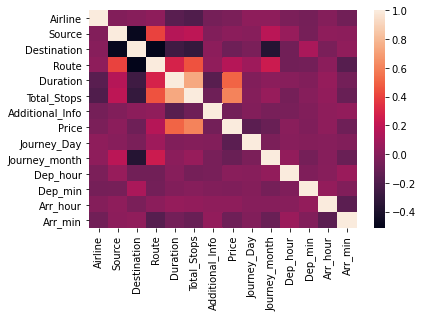

In [36]:
# Printing HeatMap
sns.heatmap(corr)

From HeatMap we can see that, **Price** is mostly depend to **Total_Stops** and **Duration**.

In [37]:
# Extrating Target Variable from dataset
dataset_target= dataset['Price']

In [38]:
dataset.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min'],
      dtype='object')

In [39]:
# Extrating Features from dataset
dataset_feature = dataset[['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min']]

In [40]:
type(dataset_feature)

pandas.core.frame.DataFrame

In [41]:
type(dataset_target)

pandas.core.series.Series

In [42]:
# Split dataset into Train and Test part(80% Train, 20% Test)
from sklearn.model_selection import train_test_split
dataset_feature_train, dataset_feature_test, dataset_target_train, dataset_target_test = train_test_split(dataset_feature, dataset_target, test_size = 0.20,random_state = 150)

In [43]:
print(dataset_feature_train.shape)
print(dataset_feature_test.shape)
print(dataset_target_train.shape)
print(dataset_target_test.shape)

(8545, 13)
(2137, 13)
(8545,)
(2137,)


In [44]:
# Following Model could be applied.
# Linear Regression
# KNN Regression
# SVM
# Lidge & Rasso
# Decision Tree
# Random  Forest Regression


In [45]:
 # Importing required Libraries for implementing Regression Models and Calculating Accuracy on Test Dataset
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve 
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn.metrics import mean_squared_error as mse
 from sklearn.metrics import r2_score

 from math import sqrt

 from sklearn.linear_model import Ridge
 from sklearn.linear_model import Lasso
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.pipeline import Pipeline
 from sklearn.pipeline import make_pipeline
 from sklearn.preprocessing import PolynomialFeatures
 from sklearn.preprocessing import StandardScaler
 from sklearn.svm import SVR

In [46]:
# Calculate Mean Absolute Percentage Error for predicted data
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
# Calculating Root Mean Squared Error, Mean absolute Error and R-Square
def make_report(act , pred):
    print("Root mean squared error: ", sqrt(mse(act.values, pred)))
    print("Mean absolute % error: ", round(mape(act.values, pred)))
    print("R-squared: ", r2_score(act.values, pred))    # It represent How close the data are to fitted regression line.

In [48]:
#linear Regression
reg = LinearRegression().fit(dataset_feature_train, dataset_target_train)
prediction = reg.predict(dataset_feature_test)
make_report(dataset_target_test,prediction)

Root mean squared error:  3478.829472811593
Mean absolute % error:  32
R-squared:  0.460362618587577


In [49]:
#KNN
knn = KNeighborsRegressor(n_neighbors=3)
knn = knn.fit(dataset_feature_train,dataset_target_train)
prediction = knn.predict(dataset_feature_test)
make_report(dataset_target_test,prediction)

Root mean squared error:  2976.111497020474
Mean absolute % error:  18
R-squared:  0.6050572554914387


In [50]:
# SVM
regr = make_pipeline(StandardScaler(), SVR( epsilon=0.5,kernel='poly'))
regr =regr.fit(dataset_feature_train,dataset_target_train) 
prediction = regr.predict(dataset_feature_test)
make_report(dataset_target_test,prediction)

Root mean squared error:  4618.871531265564
Mean absolute % error:  48
R-squared:  0.048721873796105486


In [51]:
# Ridge Regression
ridge = Ridge(alpha=50)
ridge = ridge.fit(dataset_feature_train,dataset_target_train)
prediction = ridge.predict(dataset_feature_test)
make_report(dataset_target_test,prediction)

Root mean squared error:  3481.6955513939306
Mean absolute % error:  32
R-squared:  0.45947307785892155


In [52]:
# lasso Regression
lasso = Lasso(alpha=1)
lasso = lasso.fit(dataset_feature_train,dataset_target_train)
prediction = lasso.predict(dataset_feature_test)
make_report(dataset_target_test,prediction)

Root mean squared error:  3479.001890205059
Mean absolute % error:  32
R-squared:  0.46030912635569954


In [53]:
# Decision Tree
tree = DecisionTreeRegressor(random_state = 0,max_depth=17)
tree = tree.fit(dataset_feature_train,dataset_target_train) 
prediction = tree.predict(dataset_feature_test)
make_report(dataset_target_test,prediction)

Root mean squared error:  1758.5447988708952
Mean absolute % error:  8
R-squared:  0.8621068738541043


In [54]:
#for generate graph of Rendom forest
from sklearn.tree import export_graphviz
import pydot

In [55]:
#Random Forest
forest = RandomForestRegressor(n_estimators = 300, random_state = 0)
forest = forest.fit(dataset_feature_train,dataset_target_train) 
prediction = forest.predict(dataset_feature_test)
make_report(dataset_target_test,prediction)

Root mean squared error:  1493.330612858372
Mean absolute % error:  8
R-squared:  0.900563076101905


In [56]:
#export graph file
tree=forest.estimators_[5]
dataset_list = list(dataset_feature.columns)
export_graphviz(tree,out_file='tree.dot',feature_names = dataset_list,rounded=True,precision=1)

In [57]:
# save Image in google drive
(graph,)=pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

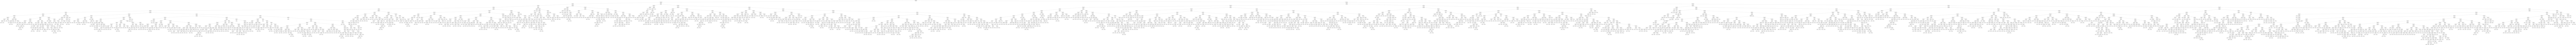

In [58]:
# Display image 
from IPython.display import Image
img= Image(filename = 'tree.png')
# img.rotate(180)
img

Conclusion: After Performining All regression technique we get maximum **R-Square in Random Forest**. So we are using it for testing data.

# Testing Phase

In [59]:
# Read Excel File
test_dataset = pd.read_excel('Flight_Price_Prediction_Test_data.xlsx')

In [60]:
test_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [61]:
# Convert Categorical Value to Numeric value
test_dataset['Airline'].replace(['Air Asia','Air India','GoAir',
                                'IndiGo', 'Jet Airways','Jet Airways Business', 
                                'Multiple carriers','Multiple carriers Premium economy', 'SpiceJet', 
                                'Trujet','Vistara', 'Vistara Premium economy'],
                               [1,2,3,4,5,6,7,8,9,10,11,12], inplace= True)
test_dataset['Additional_Info'].replace(['1 Long layover', '1 Short layover', '2 Long layover',
                                    'Business class', 'Change airports', 'In-flight meal not included',
                                    'No Info', 'No check-in baggage included', 'No info',
                                    'Red-eye flight'],
                                   [1,2,3,4,5,6,7,8,9,10], inplace= True)

In [62]:
# Converting Hours into Minute 
# Convert Duration column into Minute
test_dataset['Duration']=  test_dataset['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [63]:
# Convert Categorical Value to Numeric value for Total_Stop
test_dataset['Total_Stops'].replace(['1 stop','non-stop','2 stops','3 stops','4 stops'],[1,0,2,3,4], inplace= True)

In [64]:
# Convert Categorical Value to Numeric value for Source nad Destination
test_dataset['Source'].replace(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'],[1,2,3,4,5], inplace= True)
test_dataset['Destination'].replace(['Banglore', 'Cochin', 'Delhi', 'Kolkata', 'Hyderabad','New Delhi'],[1,2,3,4,5,6], inplace= True)

In [65]:
# Splitting Date_of_Journey column into two different column
# Add two new columns 'Journey_Day' and 'Journey_month' 
test_dataset['Journey_Day']=test_dataset['Date_of_Journey'].str.split("/").str[0].astype(int)
test_dataset['Journey_month']=test_dataset['Date_of_Journey'].str.split("/").str[1].astype(int)

# Removing 'Date_of_Journey' column
test_dataset.drop(['Date_of_Journey'],axis=1,inplace=True)

In [66]:
# Splitting 'Dep_Time' column into two different column
# Adding two new columns 'Dep_hour' and 'Dep_min' 
test_dataset["Dep_hour"] = pd.to_datetime(test_dataset["Dep_Time"]).dt.hour
test_dataset["Dep_min"] = pd.to_datetime(test_dataset["Dep_Time"]).dt.minute

# Removing 'Dep_Time' column
test_dataset.drop(['Dep_Time'],axis=1,inplace=True)

In [67]:
# Splitting 'Arrival_Time' column into two different column
# Adding two new columns 'Arr_hour' and 'Arr_min'
test_dataset["Arr_hour"] = pd.to_datetime(test_dataset["Arrival_Time"]).dt.hour
test_dataset["Arr_min"] = pd.to_datetime(test_dataset["Arrival_Time"]).dt.minute

# Removing 'Arrival_Time' column
test_dataset.drop(['Arrival_Time'],axis=1,inplace=True)

In [68]:
# Convert Categorical Value to Numeric Value for 'Route' 
test_dataset['Route'] = pd.Categorical(test_dataset['Route'])
test_dataset['Route'] = test_dataset['Route'].cat.codes

In [69]:
test_dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,5,3,2,76,655,1,9,6,6,17,30,4,25
1,4,4,1,65,240,1,9,12,5,6,20,10,20
2,5,3,2,76,1425,1,6,21,5,19,15,19,0
3,7,3,2,76,780,1,9,21,5,8,0,21,0
4,1,1,3,16,170,0,9,24,6,23,55,2,45


In [70]:
# Price prediction Using Random Forest Prediction 
prediction = np.round(forest.predict(test_dataset),2)

In [71]:
print(len(prediction))

2671


In [72]:
# Printing Price
for i in prediction:
    print(i,end=',  ')

12962.9,  4774.37,  11465.99,  10561.55,  3858.12,  10045.18,  9177.21,  6111.36,  5186.06,  18618.16,  8134.2,  6183.75,  14528.8,  11186.68,  10501.35,  16797.16,  8831.77,  12085.3,  9710.62,  13544.31,  12292.01,  9115.35,  10727.74,  13032.18,  4815.43,  8362.75,  4831.3,  12697.23,  10451.06,  13474.54,  6630.1,  9543.93,  13863.09,  8042.25,  4582.28,  4120.76,  7745.19,  22113.15,  9537.23,  7667.82,  4065.06,  12232.67,  2214.39,  8397.6,  6940.82,  4083.16,  14326.09,  3893.63,  18565.63,  8199.2,  10685.48,  7551.64,  16215.72,  19171.12,  3634.6,  7229.0,  6015.2,  7859.14,  5989.62,  8697.22,  9196.81,  11205.89,  6112.28,  6773.92,  6040.4,  4116.93,  5957.45,  11706.25,  3955.94,  7605.55,  3311.36,  11500.36,  10940.26,  6437.68,  4699.74,  4706.02,  3595.25,  10304.55,  7572.83,  16393.56,  3654.91,  8502.88,  6154.7,  4457.34,  9412.25,  8282.35,  3885.92,  11258.06,  3980.52,  16339.61,  8915.47,  10826.56,  6178.48,  9121.06,  3650.2,  3445.96,  9869.59,  15366.43, 

In [73]:
# Store result in xlsx file
col =['Price']
df = pd.DataFrame(prediction,columns=col)
file_path = 'Flight_Price_Prediction.xlsx'
df.to_excel(file_path,index=False)